# Saving and loading models
- The process of saving and loading a trained model is called model serialization.

## Serializing a Model to Disk
- Calling model.save to save model to disk and calling load_model to loading a saved model from disk

In [32]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import import_ipynb
from utils import ImageToArrayPreprocessor, SimplePreprocessor, SimpleDatasetLoader
from ShallowNet import ShallowNet
import cv2

In [33]:
args = {
    "dataset":"/home/vinayak/Desktop/PyImageSearch/DL4CV/dogs-v-cats/animals/animals/",
    "model_path":"/home/vinayak/Desktop/PyImageSearch/DL4CV/Code/shallownet_weights.hdf5"
}

In [34]:
print("[INFO] loading images")
imagePaths = list(paths.list_images(args["dataset"]))

sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float")/255.0

[INFO] loading images
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [12]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, 
                                                 test_size=0.25, random_state=42)
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [15]:
print("INFO compiling model")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[info] training network")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
             batch_size=32, epochs=100, verbose=1)

INFO compiling model
[info] training network
Epoch 1/100
71/71 [==============================] - 1s 10ms/step - loss: 1.0000 - accuracy: 0.4724 - val_loss: 0.9414 - val_accuracy: 0.5120
Epoch 2/100
71/71 [==============================] - 1s 11ms/step - loss: 0.9159 - accuracy: 0.5409 - val_loss: 0.9596 - val_accuracy: 0.4920
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8867 - accuracy: 0.5462 - val_loss: 0.9489 - val_accuracy: 0.5267
Epoch 4/100
71/71 [==============================] - 1s 11ms/step - loss: 0.8601 - accuracy: 0.5720 - val_loss: 0.8977 - val_accuracy: 0.5253
Epoch 5/100
71/71 [==============================] - 1s 11ms/step - loss: 0.8340 - accuracy: 0.5778 - val_loss: 0.9030 - val_accuracy: 0.5173
Epoch 6/100
71/71 [==============================] - 1s 12ms/step - loss: 0.8196 - accuracy: 0.5933 - val_loss: 1.0193 - val_accuracy: 0.5133
Epoch 7/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8088 - accuracy: 0.5978 - v

71/71 [==============================] - 1s 11ms/step - loss: 0.5081 - accuracy: 0.7818 - val_loss: 0.7608 - val_accuracy: 0.6707
Epoch 59/100
71/71 [==============================] - 1s 10ms/step - loss: 0.4922 - accuracy: 0.8040 - val_loss: 0.7476 - val_accuracy: 0.6813
Epoch 60/100
71/71 [==============================] - 1s 15ms/step - loss: 0.5043 - accuracy: 0.7880 - val_loss: 0.7413 - val_accuracy: 0.6813
Epoch 61/100
71/71 [==============================] - 1s 15ms/step - loss: 0.4893 - accuracy: 0.8049 - val_loss: 0.7836 - val_accuracy: 0.6480
Epoch 62/100
71/71 [==============================] - 1s 15ms/step - loss: 0.4848 - accuracy: 0.8071 - val_loss: 0.7662 - val_accuracy: 0.6720
Epoch 63/100
71/71 [==============================] - 1s 14ms/step - loss: 0.4809 - accuracy: 0.8049 - val_loss: 0.7470 - val_accuracy: 0.6773
Epoch 64/100
71/71 [==============================] - 1s 14ms/step - loss: 0.4761 - accuracy: 0.8044 - val_loss: 0.7546 - val_accuracy: 0.6747
Epoch 65/100

In [23]:
print("INFO serializing network")
model.save(args["model_path"]) #in HDF5 format

INFO serializing network


In [25]:
print("INFO evaluating network")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                           predictions.argmax(axis=1),
                           target_names=["cat","dog","panda"]))

INFO evaluating network
              precision    recall  f1-score   support

         cat       0.70      0.48      0.57       249
         dog       0.60      0.76      0.67       262
       panda       0.80      0.82      0.81       239

    accuracy                           0.68       750
   macro avg       0.70      0.68      0.68       750
weighted avg       0.69      0.68      0.68       750



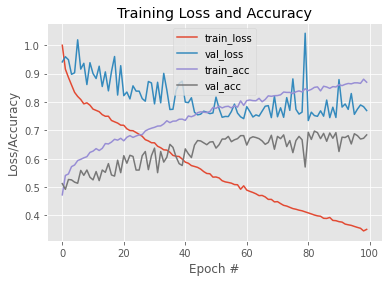

In [26]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Loading a pretrained model

In [27]:
classLabels = ["cat","dog","panda"]
print("INFO sampling images")
imagePaths = np.array(list(paths.list_images(args["dataset"])))
idxs = np.random.randint(0, len(imagePaths), size=(10,))
imagePaths = imagePaths[idxs]

INFO sampling images


In [28]:
sp = SimplePreprocessor(32,32)
iap = ImageToArrayPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths)
data = data.astype("float")/255.0

In [29]:
print("INFO loading pretrained network")
model = load_model(args["model_path"])

INFO loading pretrained network


In [30]:
print("INFO predicting")
preds = model.predict(data, batch_size=32).argmax(axis=1)

INFO predicting


In [35]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    cv2.putText(image, "Label:{}".format(classLabels[preds[i]]), 
               (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.imshow("Image", image)
    cv2.waitKey(0)

IndexError: index 10 is out of bounds for axis 0 with size 10